In [1]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
df = pd.DataFrame(
    {
        'GTP':[10, 100, 1000], 
        '0ATP': [1.94, 7.44, 12.92], 
        '003ATP': [1.72, 7.35, 12.94], 
        '010ATP': [1.67, 6.48, 13.59], 
        '030ATP':[1.11, 6.02, 12.31], 
        '100ATP':[0.59, 3.91, 10.17], 
        '300ATP': [0.23, 1.64, 6.33]
    }
)

In [2]:
def four_param_logistic(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)


atp_conc = np.array([0, 0.03, 0.1, 0.3, 1, 3])  
activity = df.iloc[0, 1:].values


p0 = [0.001, 1.725, 0.5, 1] 
bounds = ([0, 1.72, 0.03, 0.1], [0.23, 1.73, 1, 2])  
params, cov = curve_fit(four_param_logistic, atp_conc, activity, p0=p0, bounds=bounds)
print(f'Low Activity: {params[0]:.2f};\nHigh Activity: {params[1]:.2f};\nIC50: {params[2]:.2f};\nSlope: {params[3]:.2f}')


Low Activity: 0.17;
High Activity: 1.73;
IC50: 0.45;
Slope: 1.50


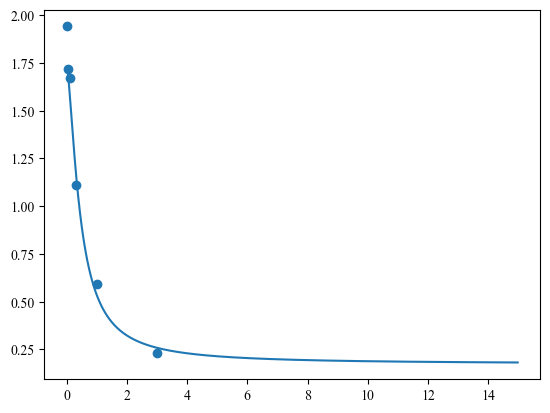

In [3]:
a = np.arange(0, 15, 0.02)
fit_y = four_param_logistic(a, 0.17394776,1.73,0.44940049,1.50459321)
plt.plot(a, fit_y)
plt.scatter((atp_conc), df.iloc[0, 1:])

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hp\AppData\Local\Temp\ipykernel_20268\3338167436.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Activity\n($\mu mol/mg \cdot min$)')
C:\Users\hp\AppData\Local\Temp\ipykernel_20268\2207245494.py:2: RuntimeWarning: invalid value encountered in power
  return bottom + (top - bottom) / (1 + (x / ic50)**hill)
C:\Users\hp\AppData\Local\Temp\ipykernel_20268\3338167436.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(a), fit_logy, color = 'grey')


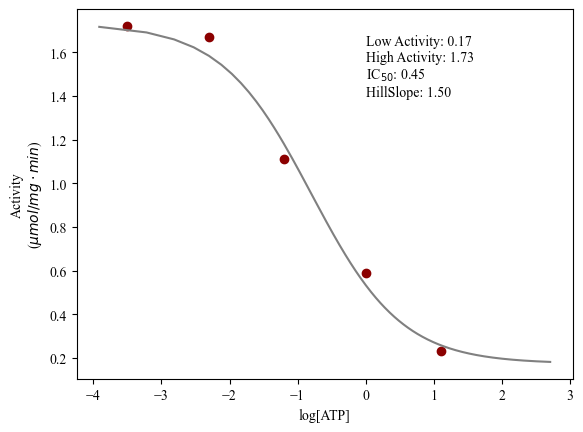

In [5]:
a = np.arange(-15, 15, 0.02)
fit_logy = four_param_logistic(a, 0.17394776,1.73,0.44940049,1.50459321)
plt.plot(np.log(a), fit_logy, color = 'grey')
plt.scatter(np.log(atp_conc[1:]), df.iloc[0, 2:], c = 'darkred')
plt.text(
    0, 1.4, 
    f'Low Activity: {params[0]:.2f}\nHigh Activity: {params[1]:.2f}\nIC$_{{50}}$: {params[2]:.2f}\nHillSlope: {params[3]:.2f}'
)
plt.xlabel('log[ATP]')
plt.ylabel('Activity\n($\mu mol/mg \cdot min$)')
plt.savefig('4pl_fit.png', dpi = 600)